In [1]:
# import dealed data
# !pip install pandas
# !pip install matplotlib

import pandas as pd

%time df_dealed_data = pd.read_pickle('muggles_dealed_data.pickle')

CPU times: user 1.71 ms, sys: 491 µs, total: 2.2 ms
Wall time: 3.17 ms


In [2]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

# print('all font list get from matplotlib.font_manager:')
# for f in sorted(mpl_fonts):
#     print('\t' + f)

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [3]:
# simplify group names

list_group = list(df_dealed_data['Group'])
for i in range(0, len(list_group)):
    list_group[i] = list_group[i].strip('麻瓜女孩向前衝')

df_dealed_data['Group'] = list_group

df_dealed_data.head()

,Title,Published_date,Views,Likes,Tags,Comments,Likes/Views(%),Comments/Likes(%),Comments/Views(%),Time Duration,Group
95,你們有辦法做出這個表情嗎？,2023-07-27,1421103,38613,[],2038,2.72,5.28,0.14,262,shorts
341,歌曲默契大考驗！一講到「雨」你會唱什麼歌？究竟兄弟、姊妹哪一組能唱出同一首歌呢？現場直接玩到...,2021-05-08,1028807,13315,"[黃氏兄弟, 歌曲, 默契大考驗, 姊妹, 兄弟, 默契, 接歌, 猜歌, 八年級流行歌, ...",840,1.29,6.31,0.08,1072,挑戰
372,台灣年輕人對中國的看法大調查！愛插隊、吃野味、用詞跟台灣是不同世界？來自中國的 @lia52...,2021-01-23,916344,18413,"[台灣人, 中國人, 印象, 偏見, 年輕人, 刻板印象, 小哥哥, 小姐姐, 貧富差距, ...",8756,2.01,47.55,0.96,1177,調查
98,投籃接力挑戰！最後一個也太有壓力了吧...,2023-07-20,850616,28126,"[籃球, 投籃, 接力, 三分球, 罰球, 籃下, BASKETBALL, shooting...",80,3.31,0.28,0.01,269,shorts
299,西門町突襲接老歌！年輕人會唱青蘋果樂園嗎？你能接得出來幾首？｜麻瓜街訪,2021-10-02,822117,9342,"[街訪, 年輕人, 接歌, 老歌, 懷念金曲, 經典歌曲, 70年代金曲, 80年代金曲, ...",991,1.14,10.61,0.12,925,街訪


In [4]:
# create new df

group_data = {'Group': (df_dealed_data['Group']).unique()}

list_count = []
for i in group_data['Group']:
    list_count.append(len(df_dealed_data[df_dealed_data['Group'] == i]))
group_data['Count'] = list_count

df_muggle_group = pd.DataFrame(group_data)

df_muggle_group = df_muggle_group.sort_values(by=['Count'], ascending=False)

df_muggle_group

,Group,Count
1,挑戰,241
3,街訪,53
8,出遊,49
5,團康,35
4,呱呱,34
2,調查,33
0,shorts,22
6,日常,15
11,開箱,11
13,直播,11


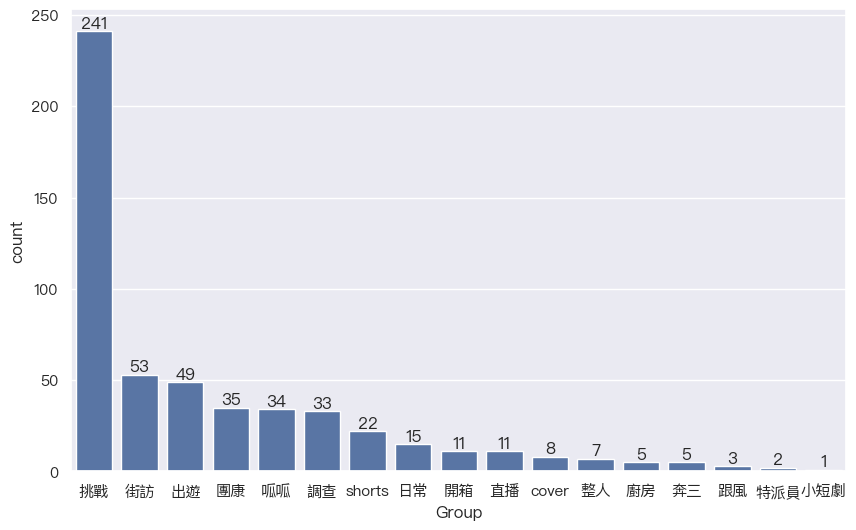

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(font="PingFang HK") # Songti SC; PingFang HK

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Group', data=df_dealed_data, \
              order=df_dealed_data['Group'].value_counts().index)
ax.bar_label(ax.containers[0]);

# s = df['class'].value_counts(ascending=True)           # compute counts by class
# ax = sns.barplot(x=s.index, y=s.values, order=s.index) # plot count plot
# ax.set(xlabel='class', yticks=[], title='Number of survivors by class', frame_on=False) # prettify
# ax.tick_params(length=0)                               # remove tick liens
# ax.bar_label(ax.containers[0]);                        # add bar labels

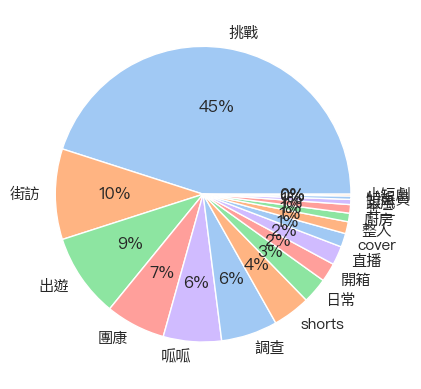

In [6]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_muggle_group['Count'], labels=df_muggle_group['Group'],\
        colors=colors, autopct='%.0f%%')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


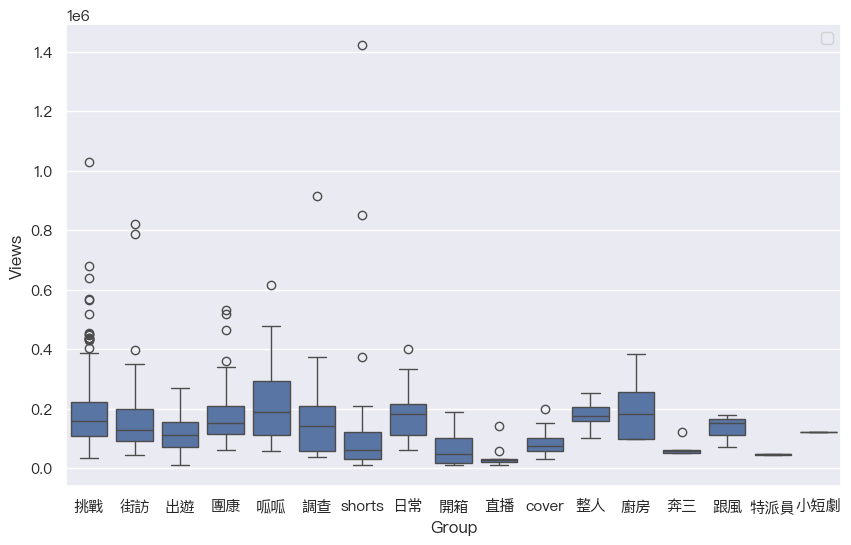

In [7]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Group', y='Views', data=df_dealed_data, 
            order=df_dealed_data['Group'].value_counts().index)

plt.legend(loc=0)

In [72]:
# sns.violinplot(x='Group', y='Views', data=df_dealed_data)
# sns.swarmplot(x='Group', y='Views', data=df_dealed_data, color='white')

## Without Outlier

In [8]:
import pandas as pd

%time df_losse_outlier = pd.read_pickle('muggle_no_outlier_loose.pickle')

df_losse_outlier.head()

CPU times: user 2.29 ms, sys: 1.88 ms, total: 4.16 ms
Wall time: 4.71 ms


,Title,Published_date,Views,Likes,Tags,Comments,Likes/Views(%),Comments/Likes(%),Comments/Views(%),Time Duration,Group
154,刮刮樂決定一天2.0！直衝外縣市！交通、住宿、晚餐刮多少花多少！中0元去「屋馬」上廁所？這個...,2023-01-21,569687,4825,"[刮刮樂, 過年, 實測, 悲劇, 創新, 摃龜, 回本, 新年, 新年快樂, 虎年, 爆笑...",221,0.85,4.58,0.04,449,挑戰
261,用刮刮樂決定一天！只能用刮中的金額吃飯、治裝和住宿！中0元的就又餓肚子又睡路邊｜麻瓜挑戰,2022-02-02,565072,5825,"[刮刮樂, 過年, 實測, 悲劇, 創新, 摃龜, 回本, 新年, 新年快樂, 虎年, 爆笑...",304,1.03,5.22,0.05,802,挑戰
511,精選5個爆笑遊戲！中秋團聚不無聊💁‍♀｜麻瓜團康🎲,2019-08-31,532780,4664,"[爆笑, 團康, 遊戲, 中秋節, 月餅, 林記餅舖, 三個麻瓜, 麻瓜挑戰, 中秋節遊戲,...",192,0.88,4.12,0.04,1688,團康
505,那些年最洗腦的廣告歌─九宮格PK賽！一聽你就會哼🎵｜麻瓜挑戰💪,2019-09-25,519583,5357,"[洗腦, 廣告歌, 青春, 八年級生, 懷舊, 學生時代, 猜歌, 遊戲, 電視兒童, 麻瓜...",366,1.03,6.83,0.07,1663,挑戰
361,動漫卡通默契大考驗2.0！ 一想到天竺鼠車車！你會想到什麼動作？竟然直接變大法師...直接笑...,2021-03-03,518604,6840,"[動漫, 卡通, 默契, 遊戲, 搞笑, 經典, 電視兒童, 進擊的巨人, 鬼滅之刃, 我的...",520,1.32,7.60,0.10,1138,團康


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


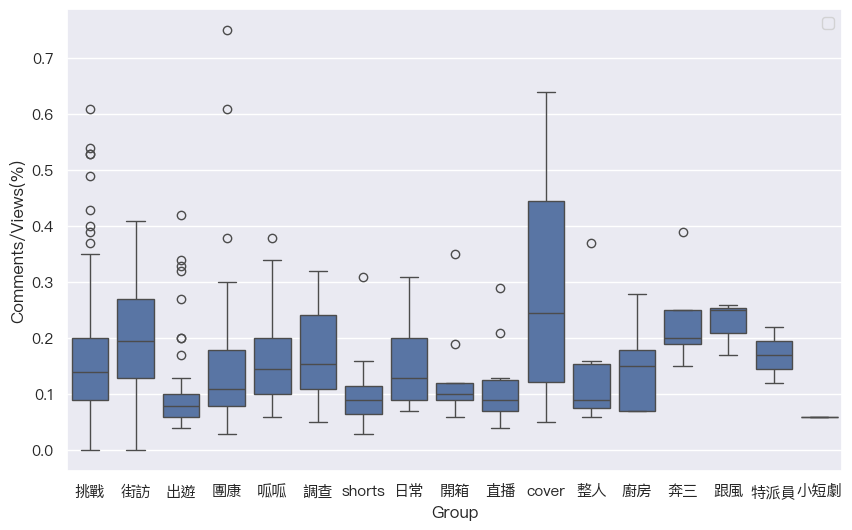

In [10]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Group', y='Comments/Views(%)', data=df_losse_outlier, 
            order=df_losse_outlier['Group'].value_counts().index)

plt.legend(loc=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 2.4 ms, sys: 771 µs, total: 3.17 ms
Wall time: 3.18 ms


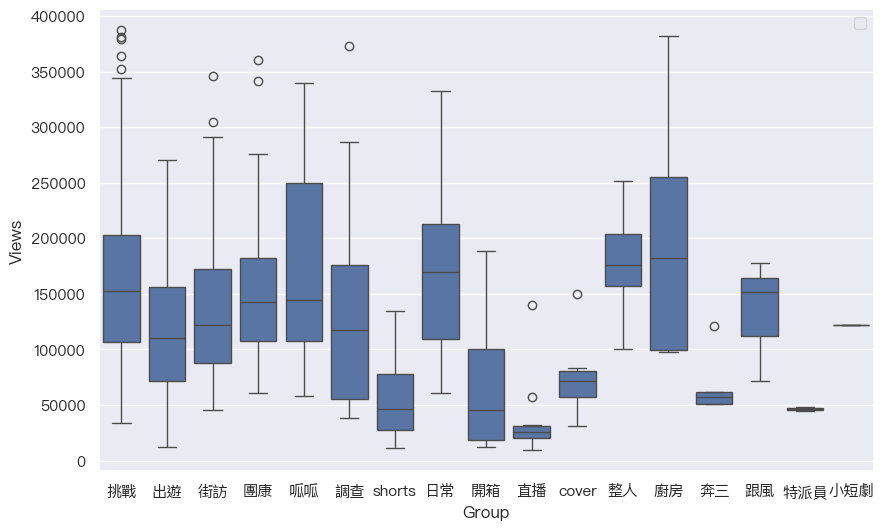

In [82]:
%time df_tight_outlier = pd.read_pickle('muggle_no_outlier_tight.pickle')

df_tight_outlier.head();

plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Group', y='Views', data=df_tight_outlier, 
            order=df_tight_outlier['Group'].value_counts().index)

plt.legend(loc=0)